In [0]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [31]:
df=pd.read_csv("Breast.csv")
df.shape

(699, 10)

In [32]:
df.head()

,clump_thickness,cell_shape_uniformity,cell_size_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [33]:
df.tail()

,clump_thickness,cell_shape_uniformity,cell_size_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1
698,4,8,8,5,4,5,10,4,1,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness                699 non-null int64
cell_shape_uniformity          699 non-null int64
cell_size_uniformity           699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null object
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [35]:
pd.isnull(df).any()

clump_thickness                False
cell_shape_uniformity          False
cell_size_uniformity           False
marginal_adhesion              False
single_epithelial_cell_size    False
bare_nuclei                    False
bland_chromatin                False
normal_nucleoli                False
mitoses                        False
class                          False
dtype: bool

In [36]:
pd.isnull(df).sum()

clump_thickness                0
cell_shape_uniformity          0
cell_size_uniformity           0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [37]:
df.describe()

,clump_thickness,cell_shape_uniformity,cell_size_uniformity,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [38]:
#DUMMY CODING USING THE LOOP STRUCTURE
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=pd.Categorical(df[col]).codes
    df.head(5)

,clump_thickness,cell_shape_uniformity,cell_size_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,2,3,2,1,0
2,3,1,1,1,2,3,3,1,1,0
3,6,8,8,1,3,5,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness                699 non-null int64
cell_shape_uniformity          699 non-null int64
cell_size_uniformity           699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null int8
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(9), int8(1)
memory usage: 50.0 KB


In [40]:
correlation=df.corr()
correlation

,clump_thickness,cell_shape_uniformity,cell_size_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.363041,0.558428,0.535835,0.350034,0.716001
cell_shape_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.440338,0.755721,0.722865,0.458693,0.817904
cell_size_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.441044,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.299916,0.666715,0.603352,0.417633,0.696800
single_epithelial_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.374883,0.616102,0.628881,0.479101,0.682785
bare_nuclei,0.363041,0.440338,0.441044,0.299916,0.374883,1.000000,0.375456,0.408639,0.232359,0.509471
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.375456,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.408639,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.232359,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.509471,0.756616,0.712244,0.423170,1.000000


<Figure size 1080x1080 with 0 Axes>

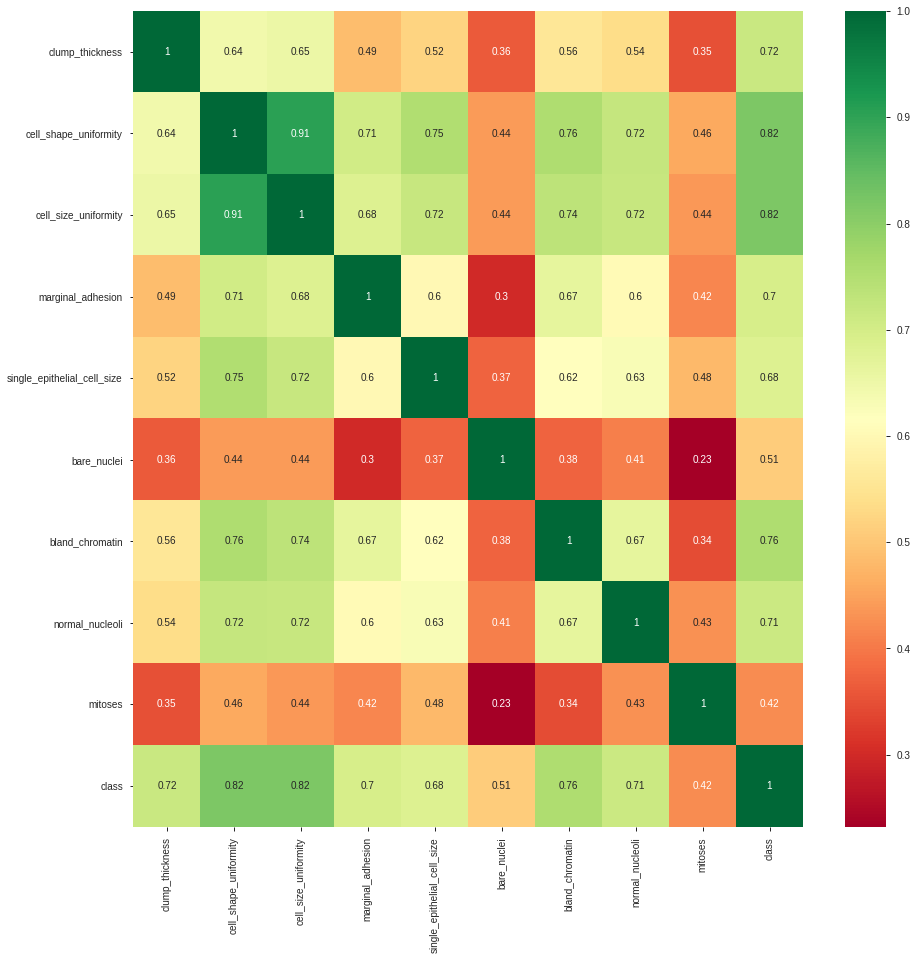

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cmap="RdYlGn",annot=True)
#sns.heatmap?
plt.show()

In [42]:
x=df.drop(['class'],axis=1)
x.head()

,clump_thickness,cell_shape_uniformity,cell_size_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,2,3,2,1
2,3,1,1,1,2,3,3,1,1
3,6,8,8,1,3,5,3,7,1
4,4,1,1,3,2,1,3,1,1


In [43]:
y=df['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [44]:
#create test and train data 70% and 30% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3)
train_x.shape
test_x.shape
train_x.shape
train_y.shape

(489, 9)

(210, 9)

(489, 9)

(489,)

In [0]:
#BUILD A LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=1000)

In [46]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
log.coef_

array([[ 0.55377575, -0.0233134 ,  0.42386621,  0.37634431,  0.03173547,
         0.3138597 ,  0.51297441,  0.16824023,  0.74322896]])

In [0]:
#FIND OUT KEY PREDICTOR class
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)

In [50]:
coeff.columns=("variables","coeff")
coeff.sort_values("variables",ascending=True)

,variables,coeff
5,bare_nuclei,0.313860
6,bland_chromatin,0.512974
1,cell_shape_uniformity,-0.023313
2,cell_size_uniformity,0.423866
0,clump_thickness,0.553776
3,marginal_adhesion,0.376344
8,mitoses,0.743229
7,normal_nucleoli,0.168240
4,single_epithelial_cell_size,0.031735


In [51]:
#GENERATE MODEL DIAGNOSTICS
classes=log.predict(test_x)
print(classes.size)

210


In [52]:
print("positive cases in test data:",test_y[test_y==1].shape[0])
print("Negative cases in Test Data:",test_y[test_y==0].shape[0])

positive cases in test data: 80
Negative cases in Test Data: 130


In [53]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.9666666666666667


In [54]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       130
           1       0.96      0.95      0.96        80

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



In [55]:
#AUC
print("AUC")
auc=metrics.roc_auc_score(test_y,classes)
auc

AUC


0.9634615384615384

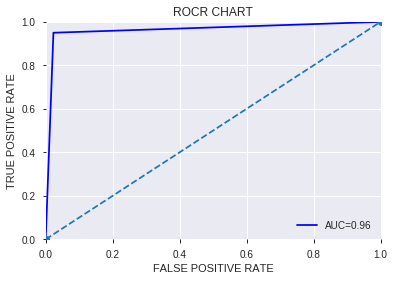

In [56]:
#ROC CHART
fpr,tpr,th=roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title("ROCR CHART")
plt.plot(fpr,tpr,'b',label="AUC=%0.2F"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"o--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("TRUE POSITIVE RATE")
plt.xlabel("FALSE POSITIVE RATE")
plt.show();

CONFUSION MATRIX


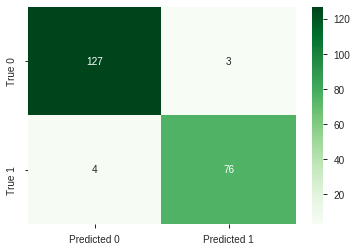

In [57]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [58]:
import pandas_profiling
eda_report=pandas_profiling.ProfileReport(df)
eda_report
eda_report.to_file("eda_report.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,10
Number of observations,699
Total Missing (%),0.0%
Total size in memory,50.0 KiB
Average record size in memory,73.2 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,1
